In [2]:
import dask.dataframe as ds

In [3]:
import catboost as cb

In [4]:
#open dataset in dask with network_traffic_data.csv
df = ds.read_csv('network_traffic_data.csv')


In [ ]:
#EDA via DataPrep
import dataprep
report = create_report(dataset_x_train, progress=True)

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,5480074,3,1,12,0,6,0,4.000,3.465,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,443,711977,9,10,703,3950,267,0,78.100,103.300,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,53,153398,2,2,80,224,40,40,40.000,0.000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,53,57660,1,1,46,128,46,46,46.000,0.000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,8446,767,3,1,43,6,31,6,14.336,14.440,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df.shape

(Delayed('int-479e384e-692e-473f-ac11-1d31c2e20873'), 79)

In [7]:
df.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
Label                           object
Length: 79, dtype: object

In [8]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [9]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [10]:
#remove duplicate rows from the dataset
df.drop_duplicates().compute()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,5480074,3,1,12,0,6,0,4.000,3.465,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,443,711977,9,10,703,3950,267,0,78.100,103.300,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,53,153398,2,2,80,224,40,40,40.000,0.000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,53,57660,1,1,46,128,46,46,46.000,0.000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,8446,767,3,1,43,6,31,6,14.336,14.440,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263466,80,11512204,8,5,326,11632,326,0,40.750,115.250,...,32,892.0,0.0,892,892,6507197.0,0.0,6507197,6507197,DoS GoldenEye
263467,80,11513325,5,5,471,3525,471,0,94.200,210.600,...,32,918.0,0.0,918,918,6508582.0,0.0,6508582,6508582,DoS GoldenEye
263468,80,11509201,7,6,314,11632,314,0,44.840,118.700,...,32,899.0,0.0,899,899,6503248.0,0.0,6503248,6503248,DoS GoldenEye
263469,80,11509095,8,5,369,11632,369,0,46.120,130.500,...,32,914.0,0.0,914,914,6504954.0,0.0,6504954,6504954,DoS GoldenEye


In [11]:
df.count().compute()

 Destination Port              539616
 Flow Duration                 539616
 Total Fwd Packets             539616
 Total Backward Packets        539616
Total Length of Fwd Packets    539616
                                ...  
Idle Mean                      539616
 Idle Std                      539616
 Idle Max                      539616
 Idle Min                      539616
Label                          539616
Length: 79, dtype: int64

In [12]:
# check for null values
df.isna().sum().compute()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
Label                          0
Length: 79, dtype: int64

In [13]:
#  get the percentage of null values in each column
df.isna().mean().compute()

 Destination Port              0.0
 Flow Duration                 0.0
 Total Fwd Packets             0.0
 Total Backward Packets        0.0
Total Length of Fwd Packets    0.0
                              ... 
Idle Mean                      0.0
 Idle Std                      0.0
 Idle Max                      0.0
 Idle Min                      0.0
Label                          0.0
Length: 79, dtype: float64

In [15]:
# extract target column and remove it from the dataset
y = df["Label"]

In [16]:
# drop the target column from the dataset
X = df.drop("Label", axis=1)

In [18]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X.compute(), y.compute(), test_size=0.2)


In [21]:
# check the shape of train and test
x_train.shape


(431692,)

In [22]:
y_train.shape

(431692,)

In [20]:
# check the shape of test
x_test.shape

(107924, 78)

In [23]:
y_test.shape

(107924,)

In [24]:
#load trainig dataset to catboost
cb_train = cb.Pool(x_train, y_train)

In [25]:
cab_model = cb.CatBoostClassifier()

In [26]:
cab_model.fit(cb_train)

Learning rate set to 0.107824
0:	learn: 1.4932615	total: 1.63s	remaining: 27m 8s
1:	learn: 1.2132657	total: 2.92s	remaining: 24m 18s
2:	learn: 1.0236426	total: 4.23s	remaining: 23m 25s
3:	learn: 0.8774552	total: 5.56s	remaining: 23m 4s
4:	learn: 0.7648479	total: 6.92s	remaining: 22m 56s
5:	learn: 0.6715040	total: 8.31s	remaining: 22m 56s
6:	learn: 0.5990252	total: 9.71s	remaining: 22m 57s
7:	learn: 0.5346234	total: 11.1s	remaining: 22m 50s
8:	learn: 0.4808681	total: 12.4s	remaining: 22m 40s
9:	learn: 0.4323072	total: 13.6s	remaining: 22m 31s
10:	learn: 0.3913401	total: 15s	remaining: 22m 28s
11:	learn: 0.3549743	total: 16.3s	remaining: 22m 22s
12:	learn: 0.3246522	total: 17.6s	remaining: 22m 15s
13:	learn: 0.2950011	total: 18.9s	remaining: 22m 12s
14:	learn: 0.2704411	total: 20.2s	remaining: 22m 7s
15:	learn: 0.2483168	total: 21.5s	remaining: 22m 3s
16:	learn: 0.2289460	total: 22.9s	remaining: 22m 1s
17:	learn: 0.2117749	total: 24.1s	remaining: 21m 56s
18:	learn: 0.1950612	total: 25.4s

In [31]:
#predict on test dataset
y_pred = cab_model.predict(x_test)

In [32]:
#get quality of model via accuracy, precision, recall, f1-score
cab_model.score(x_test, y_test)

0.9977576813313073

In [40]:
import catboost
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Make predictions
y_pred = cab_model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9977576813313073
Precision: 0.9084976448589218
Recall: 0.8867276483273956
F1-score: 0.8915950754505193


In [42]:
#show confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[48085,    13,     0,     4,    11,     0,     0,     0,     0,
            0,    18,     0,     0,     0,     0],
       [    8,   408,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    1,     0, 12771,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    4,     0,     0,  2017,     4,     2,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    1,     0,     1,     3, 23274,     0,     1,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    1,     0,     0,     0,     0,  1157,     4,     0,     0,
            0,     0,     0,     0,     0,     0],
       [    3,     0,     0,     0,     0,     3,  1148,     0,     0,
            0,     0,     0,     1,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,  1558,     0,
            0,     0,     0,     0,     0,     0],
       [    0,     0,   

<Axes: >

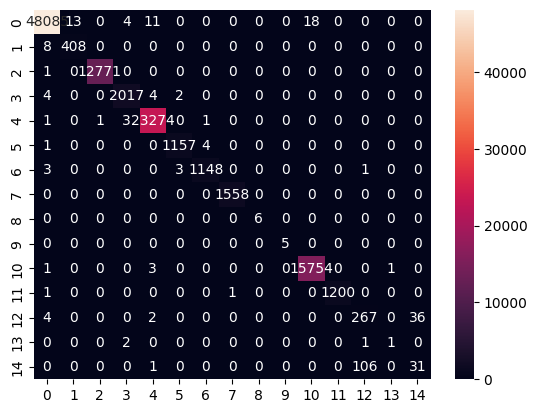

In [44]:
#visualize confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")


In [48]:
#extract features importances
importances = cab_model.get_feature_importance()

In [49]:
#export catboost model as cbm file with name of dataset+timestamp
import time
timestamp = time.strftime("%Y%m%d-%H%M%S")
cab_model.save_model(f"network_traffic_data_classification_{timestamp}.cbm")